# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [2]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

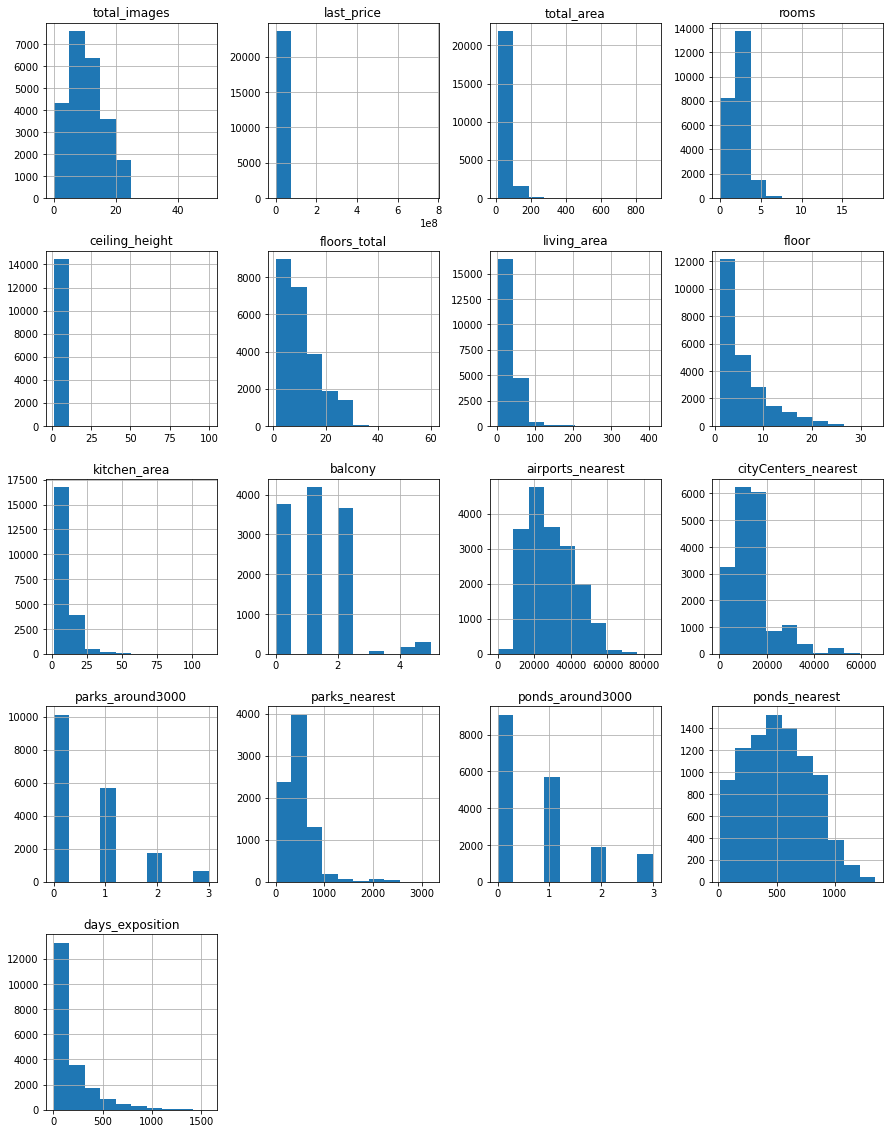

In [4]:
data.hist(figsize=(15, 20));

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Предобработка данных

При изучении информации из выгрузки можно заметить, что во многих столбцах по той или иной причине присутствуют пропуски. Начнем по порядку с ними знакомиться и исправлять.

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

    Мы видим пропуски в стобцах:
- высота потолков
- всего этажей в доме
- жилая площадь в квадратных метрах
- апартаменты
- площадь кухни в квадратных метрах
- число балконов
- название населённого пункта
- расстояние до ближайшего аэропорта в метрах
- расстояние до центра города
- число парков в радиусе 3 км
- расстояние до ближайшего парка
- число водоёмов в радиусе 3 км
- расстояние до ближайшего водоёма
- сколько дней было размещено объявление (от публикации до снятия)     

    Больше всего пропусков в информации об апартаментах, наличии балконов, ближайших парков и водоемов.      
Можно предположить, что пропуски в столбцах о балконах и аппартаментах означают отсутствие балконов и то, что квартира не является апартаментами. Правильнее будет эти пропуски заменить на значение 0. 
Проверим верна ли наша догадка.

В столбце с информацией об аппартаментах присутствуют значения и False, и True. То есть это булев тип, но почему-то тип данного столбца `Object`. Исправим это, а заодно избавимся от пропущенных значений, которые превратятся в False.

In [7]:
data['is_apartment'] = data['is_apartment'].astype('bool')

В столбце с информацией о количестве балконов пропущенные значения, вероятнее всего, означают отсутствие балкона в квартире. Заменим пропуски на `0`.

In [8]:
data['balcony'] = data['balcony'].fillna(value = 0)

Теперь о столбцах про расстояние до ближайшего парка или водоёма.
Скорее всего пропуски означают не отсутствие объектов возле квартир, а отстутвие информации об этом.
Чтобы убедиться в этой догадке, сравним столбцы о наличии парков и водоёмов в радиусе 3.000м с расстоянием до ближайшего парка/водоёма.


In [9]:
data['parks_around3000'].value_counts()

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

In [10]:
data['ponds_around3000'].value_counts()

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

Для удобства заменим пропуски в столбцах с информацией о парках/водоёмах в радиусе 3.000м значениями 0 по той же логике, по какой избавлялись от пропусков в столбцах о балконах и аппартаментах. Пропусков в данных значениях немного, а основную массу значений составляют нули.

In [11]:
data['parks_around3000'] = data['parks_around3000'].fillna(value=0)

In [12]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0)

Теперь, когда у нас нет пропусков в информации о водоёмах и парках в радиусе 3.000м мы можем проверить гипотезу о том, что причина пропусков в колонках **parks_nearest** и **ponds_nearest** именно в отсутствии ближайших водоёмов или парков.

In [13]:
parks = data[['parks_around3000', 'parks_nearest']]
ponds = data[['ponds_around3000', 'ponds_nearest']]
print(parks.head(20))
print()
print(ponds.head(20))


    parks_around3000  parks_nearest
0                1.0          482.0
1                0.0            NaN
2                1.0           90.0
3                2.0           84.0
4                2.0          112.0
5                0.0            NaN
6                0.0            NaN
7                0.0            NaN
8                0.0            NaN
9                0.0            NaN
10               1.0          310.0
11               0.0            NaN
12               0.0            NaN
13               1.0          294.0
14               0.0            NaN
15               1.0          590.0
16               3.0          420.0
17               0.0            NaN
18               1.0          759.0
19               0.0            NaN

    ponds_around3000  ponds_nearest
0                2.0          755.0
1                0.0            NaN
2                2.0          574.0
3                3.0          234.0
4                1.0           48.0
5                0.0       

Наши предположения подтвердились, можно заметить, что на каждое значение 0.0 в столбце **..._around3000** приходится значение NaN в столбце **..._nearest**

Для удобства заменим NaN на 0, который будет означать отсутствие ближайших парков парков/водоемов.  

In [14]:
data['parks_nearest'] = data['parks_nearest'].fillna(value=-1)
data['ponds_nearest'] = data['ponds_nearest'].fillna(value=-1)

In [15]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          9195
floors_total              86
living_area             1903
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2278
balcony                    0
locality_name             49
airports_nearest        5542
cityCenters_nearest     5519
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3181
dtype: int64

Проведем предобработку по столбцам, в которых она возможна. Картографические данные затрагивать не будем, так как это может негативно повлиять на дальнейшие рассчеты. 

Нужно разобраться с пропусками в столбцах с информацией о:
- высоте потолков в квартире 
- этажей в доме 
- жилой площади квартиры 
- площади кухни 
- названия населенного пункта 

Высота потолков, как мы знаем из жизненного опыта, обычно разнится в пределах 2.5-3.5м. Медианное значение по высоте потолков всех квартир в выборке отлично подойдет для заполнения пропусков данных в этом столбце. 

In [16]:
data['ceiling_height']=data['ceiling_height'].fillna(value=data['ceiling_height'].median())

С пропусками в столбце с информацией о количестве этажей в доме можно поступить точно так же. Тем более, что их совсем немного.

In [17]:
data['floors_total']=data['floors_total'].fillna(value=data['floors_total'].median())

Далее разберемся с пропусками в столбцах с информацией о жилой и кухонной площадях квартир.

<AxesSubplot:>

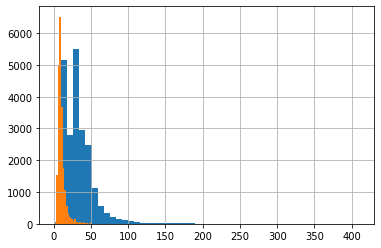

In [18]:
data['living_area'].sort_values(ascending=False).hist(bins=50)

data['kitchen_area'].sort_values(ascending=False).hist(bins=50)

Видим, что оба типа площади ведут себя примерно одинаково, а кухонная зона, как и положено, по площади гораздо меньше жилой зоны. Заменим пропуски в данных медианными значениями по столбцам. 

In [19]:
data['living_area']=data['living_area'].fillna(value=data['living_area'].median())
data['kitchen_area']=data['kitchen_area'].fillna(value=data['kitchen_area'].median())
data.isna().sum()
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,True,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,True,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,-1.0,0.0,-1.0,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,True,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,30.0,9,True,False,False,9.10,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,True,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,True,False,False,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,38.0,4,True,False,False,8.50,0.0,Тосно,NaN,NaN,0.0,-1.0,0.0,-1.0,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.7,1,True,False,False,9.10,0.0,село Рождествено,NaN,NaN,0.0,-1.0,0.0,-1.0,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,30.0,12,True,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Осталось устранить пропуски в информации о названиях населенных пунктов.
Мы не можем взять "среднее название" или "медианное название" населенного пункта. Так же как и не можем быть уверены, что если населенного пункта для квартиры в выборке нет, то квартира вообще находится в Санкт-Петербурге и соседних населенных пунктах.
**Строки с пропущенными значениями в данном столбце мы удаляем, тем более их количество не является вещественным и никак не отразится на результатах анализа.**

In [20]:
data = data.dropna()
data.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

**Мы избавились от пропущенных значений в таблице. В некоторых случаях мы присваилвали пропускам медианное значение, где-то приняли, что пропущенное значение передает отсутствие объекта, описываемого в объявлении. От строк с пропущенными названиями населенных пунктов мы избавились. К счастью, их было совсем немного.** 

Далее, приступим к поиску дубликатов. Чаще всего неявные дубликаты встречаются в названиях объектов. Из столбцов, описывающих названия, у нас `locality_name`.

In [21]:
print(data['locality_name'].nunique())
print()
print(data['locality_name'].sort_values().unique())

28

['Зеленогорск' 'Колпино' 'Красное Село' 'Кронштадт' 'Ломоносов' 'Павловск'
 'Петергоф' 'Пушкин' 'Санкт-Петербург' 'Сестрорецк' 'поселок Лисий Нос'
 'поселок Мурино' 'посёлок Александровская' 'посёлок Белоостров'
 'посёлок Левашово' 'посёлок Лисий Нос' 'посёлок Металлострой'
 'посёлок Молодёжное' 'посёлок Парголово' 'посёлок Песочный'
 'посёлок Петро-Славянка' 'посёлок Понтонный' 'посёлок Репино'
 'посёлок Сапёрный' 'посёлок Стрельна' 'посёлок Усть-Ижора'
 'посёлок Шушары' 'посёлок Щеглово']


Можно заметить, что некоторые названия наслененных пунктов записаны по разному (пос**ё**лок и пос**е**лок). Также встречаются одинаковые названия населенных пунктов с разными обозначениями (поселок Рябово, ПГТ Рябово).

In [22]:
def short_name(row):
    split=row.split()
    new_name=[]
    name=[]
    for word in split:
        if word[0].isupper():
            name.append(word)
            new_name=''.join(word for word in name)
    return new_name

Мы создали функцию, которая возвращает сами названия населенных пунктов, без их типа. Тем самым мы отсеяли неявные дубликаты, которые, как мы успели заметить, появлялись как раз из-за ошибок в типе населенных пунктов. Проверим сколько неявных дубликатов таким способом отсеяли.

In [23]:
data['locality_name'] = data['locality_name'].apply(short_name)

print(data['locality_name'].nunique())

27


**59** неявных дубликатов в названиях населенных пунктов были устранены. 
Двигаемся дальше.
Теперь нам нужно найти выбивающиеся значения(аномалии) в столбцах.

In [24]:
len(data[(data['ceiling_height'] > 6) | (data['ceiling_height'] < 2)])

17

Всего 32 объявления, где высота потолков более 5м либо менее 2м. Посмотрим на эти объявления.

In [25]:
height_anomal = data.query('ceiling_height > 6 or ceiling_height < 2')
height_anomal

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.00,9.0,30.0,2,True,False,False,7.00,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.00,5.0,19.5,1,True,False,False,5.50,0.0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5669,4,4400000.0,50.0,2017-08-08T00:00:00,2,26.00,9.0,21.3,3,True,False,False,7.00,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,-1.0,267.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.00,36.0,41.0,13,True,False,False,12.00,5.0,Санкт-Петербург,18732.0,20444.0,0.0,-1.0,3.0,80.0,38.0
5863,20,5650000.0,45.0,2018-08-15T00:00:00,1,8.30,16.0,19.3,14,True,False,False,8.30,1.0,Санкт-Петербург,13069.0,10763.0,0.0,-1.0,1.0,613.0,14.0
15061,19,5600000.0,56.4,2018-05-11T00:00:00,2,14.00,14.0,32.4,5,True,False,False,9.10,2.0,Санкт-Петербург,14814.0,13610.0,0.0,-1.0,0.0,-1.0,315.0
15743,14,5600000.0,67.0,2016-11-11T00:00:00,3,8.00,16.0,41.0,1,True,False,False,8.00,0.0,Санкт-Петербург,32691.0,11035.0,1.0,723.0,0.0,-1.0,474.0
16934,5,4100000.0,40.0,2017-10-17T00:00:00,1,1.75,37.0,17.4,5,True,False,False,8.34,0.0,Санкт-Петербург,18732.0,20444.0,0.0,-1.0,3.0,80.0,71.0
17442,0,5350000.0,54.0,2015-06-16T00:00:00,2,8.00,5.0,29.0,2,True,False,False,9.10,1.0,КрасноеСело,24638.0,28062.0,0.0,-1.0,0.0,-1.0,469.0
17857,1,3900000.0,56.0,2017-12-22T00:00:00,3,27.00,5.0,33.0,4,False,False,False,9.10,0.0,Санкт-Петербург,41030.0,15543.0,0.0,-1.0,0.0,-1.0,73.0


Приведем все значения в норму. Переместим запятую в значениях на свое место и заменим слишком низкие и слишком высокие значения на медиану по столбцу. 

In [26]:
height_anomal = data.query('ceiling_height > 6 or ceiling_height < 2')
def norm_height(row):    
    if row > 10:
        row = row/10        
    elif row < 2:
        row = data['ceiling_height'].median()        
    else:
        row = 0
    return row

height_anomal['ceiling_height'] = height_anomal['ceiling_height'].apply(norm_height)

def norm_height2(row):
    if row <2 or row >6: 
        row = data['ceiling_height'].median()
    return row

height_anomal['ceiling_height'] = height_anomal['ceiling_height'].apply(norm_height2)
height_anomal

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,2.50,9.0,30.0,2,True,False,False,7.00,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,2.40,5.0,19.5,1,True,False,False,5.50,0.0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5669,4,4400000.0,50.0,2017-08-08T00:00:00,2,2.60,9.0,21.3,3,True,False,False,7.00,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,-1.0,267.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,2.70,36.0,41.0,13,True,False,False,12.00,5.0,Санкт-Петербург,18732.0,20444.0,0.0,-1.0,3.0,80.0,38.0
5863,20,5650000.0,45.0,2018-08-15T00:00:00,1,2.65,16.0,19.3,14,True,False,False,8.30,1.0,Санкт-Петербург,13069.0,10763.0,0.0,-1.0,1.0,613.0,14.0
15061,19,5600000.0,56.4,2018-05-11T00:00:00,2,2.65,14.0,32.4,5,True,False,False,9.10,2.0,Санкт-Петербург,14814.0,13610.0,0.0,-1.0,0.0,-1.0,315.0
15743,14,5600000.0,67.0,2016-11-11T00:00:00,3,2.65,16.0,41.0,1,True,False,False,8.00,0.0,Санкт-Петербург,32691.0,11035.0,1.0,723.0,0.0,-1.0,474.0
16934,5,4100000.0,40.0,2017-10-17T00:00:00,1,2.65,37.0,17.4,5,True,False,False,8.34,0.0,Санкт-Петербург,18732.0,20444.0,0.0,-1.0,3.0,80.0,71.0
17442,0,5350000.0,54.0,2015-06-16T00:00:00,2,2.65,5.0,29.0,2,True,False,False,9.10,1.0,КрасноеСело,24638.0,28062.0,0.0,-1.0,0.0,-1.0,469.0
17857,1,3900000.0,56.0,2017-12-22T00:00:00,3,2.70,5.0,33.0,4,False,False,False,9.10,0.0,Санкт-Петербург,41030.0,15543.0,0.0,-1.0,0.0,-1.0,73.0


In [27]:
data[(data['ceiling_height'] > 6) | (data['ceiling_height'] < 2)] = height_anomal

Предположим, что жилая площадь квартиры может достигать 300кв м. Менее 10м жилой площади встречается крайне редко. 
Посмотрим на результаты среза по этим данным.

In [28]:
living_area_anomal = data.query('living_area > 300 or living_area < 10')
living_area_anomal

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
660,3,49950000.0,483.90,2017-10-04T00:00:00,7,3.20,6.0,312.5,4,True,False,False,26.4,0.0,Санкт-Петербург,23079.0,945.0,3.0,461.0,3.0,22.0,391.0
680,14,7200000.0,43.00,2017-10-31T00:00:00,1,2.65,8.0,9.0,2,True,False,False,23.0,0.0,Санкт-Петербург,23900.0,5232.0,1.0,2137.0,1.0,933.0,296.0
1326,8,8100000.0,52.00,2017-01-29T00:00:00,2,2.70,25.0,9.0,15,True,False,False,32.0,2.0,Санкт-Петербург,35555.0,15561.0,0.0,-1.0,1.0,1180.0,337.0
2309,10,4200000.0,62.40,2017-06-15T00:00:00,2,2.60,9.0,8.4,6,True,False,False,41.0,2.0,Шушары,23662.0,29448.0,0.0,-1.0,0.0,-1.0,111.0
3242,7,4440000.0,41.00,2017-07-02T00:00:00,1,2.65,17.0,3.0,17,True,False,False,11.0,0.0,Санкт-Петербург,19272.0,13073.0,0.0,-1.0,0.0,-1.0,216.0
4100,17,5300000.0,34.80,2017-06-19T00:00:00,1,2.70,23.0,9.0,15,True,False,False,17.1,0.0,Санкт-Петербург,33626.0,13495.0,0.0,-1.0,0.0,-1.0,30.0
4542,12,3300000.0,18.00,2018-11-07T00:00:00,1,3.50,5.0,9.0,2,True,False,False,9.1,0.0,Санкт-Петербург,25157.0,4948.0,2.0,349.0,1.0,963.0,9.0
5358,20,65000000.0,590.00,2019-02-14T00:00:00,15,3.50,6.0,409.0,3,True,False,False,100.0,0.0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,-1.0,14.0
8325,9,4800000.0,52.00,2017-10-25T00:00:00,2,2.65,5.0,9.0,2,True,False,False,6.0,1.0,Санкт-Петербург,33358.0,13171.0,0.0,-1.0,2.0,118.0,119.0
13915,20,6350000.0,52.00,2018-02-06T00:00:00,2,3.00,6.0,2.0,2,True,False,False,9.0,0.0,Санкт-Петербург,32453.0,6521.0,0.0,-1.0,1.0,1012.0,91.0


Очень большие площади жилого пространства встречаются только в аппартаментах за приличную цену с большим количеством комнат. Это похоже на правду. Но вот 2 жилых квадратных метра и 9 кухонных - на правду не похоже. Заменим слишком низкие значения медианными.

In [29]:
def norm_living_area(row):
    if row <10: 
        row = data['living_area'].median()  
    return row
living_area_anomal['living_area'] = living_area_anomal['living_area'].apply(norm_living_area)

data[(data['living_area'] > 300) | (data['living_area'] < 10)] = living_area_anomal

Аналогичную операцию проделаем с площадью кухни. Кухни площадью менее 4 квадратных метров обычно не встречаются, ведь меньше могут быть только ванная комната и туалет. Также как и кухни площадью более 50 квадратных метров - тоже редкость.

In [30]:
kitchen_area_anomal = data.query('kitchen_area > 50 or kitchen_area < 4')
def norm_kitchen_area(row):
    if row >50: 
        row = data['kitchen_area'].median()
    elif row < 4:
        row = data['kitchen_area'].median()    
    return row
kitchen_area_anomal['kitchen_area'] = kitchen_area_anomal['kitchen_area'].apply(norm_kitchen_area)

data[(data['kitchen_area'] > 50) | (data['kitchen_area'] < 4)] = kitchen_area_anomal

Осталось исключить аномальные значения в выборках, дабы избежать некорректного отображения информации.

In [31]:
def quartile_range(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    dataq = data.loc[(data[column] < q3 +1.5*iqr) & (data[column] > q1 - 1.5*iqr), column]
    return dataq
need_help = ['last_price', 'total_area', 'kitchen_area', 'living_area', 'rooms', 'days_exposition', 'ceiling_height']
for col in need_help:
    data[col] = quartile_range(data, col)
data.dropna()  
data.reset_index(drop=True)
data.describe()    

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,15802.000000,1.445700e+04,14960.000000,15669.000000,13698.000000,15802.000000,15200.000000,15802.000000,14890.000000,15802.000000,15802.000000,15802.000000,15802.000000,15802.000000,15802.000000,15802.000000,14496.000000
mean,9.777180,5.419840e+06,55.273024,2.046716,2.633371,11.276294,31.611449,6.197317,9.527195,0.586255,28851.409822,14305.558917,0.599924,213.911087,0.760284,258.429186,128.757450
std,5.716741,2.145017e+06,20.002269,0.984621,0.080744,6.564320,13.377142,4.982996,2.925524,0.954272,12714.190423,8561.112040,0.797468,334.459714,0.931077,325.901654,122.081807
min,0.000000,1.219000e+04,12.000000,0.000000,2.460000,1.000000,10.000000,1.000000,4.000000,0.000000,0.000000,208.000000,0.000000,-1.000000,0.000000,-1.000000,1.000000
25%,6.000000,3.850000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,3.000000,7.100000,0.000000,18496.000000,9488.000000,0.000000,-1.000000,0.000000,-1.000000,38.000000
50%,9.000000,4.850000e+06,50.800000,2.000000,2.650000,9.000000,30.000000,5.000000,9.100000,0.000000,26786.000000,13170.500000,0.000000,-1.000000,0.000000,-1.000000,86.000000
75%,14.000000,6.500000e+06,67.000000,3.000000,2.650000,16.000000,40.000000,8.000000,11.000000,1.000000,37407.000000,16395.000000,1.000000,405.000000,1.000000,503.000000,183.000000
max,50.000000,1.230398e+07,116.300000,5.000000,2.850000,60.000000,75.500000,33.000000,18.600000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,515.000000


**Вывод**: Предобработка завершена. Мы постарались исключить все аномальные или отсутствующие данные, исправили то, что возможно исправить и удалили данные, потенциально искривляющие результаты нашего исследования. Теперь с таблицей `data` можно продолжать работу. 

### Посчитайте и добавьте в таблицу новые столбцы

Рассчитаем цену одного квадратного метра для каждого объявления. Добавим в таблицу соответствующий столбец.

In [32]:
data['square_price'] = data['last_price'] / data['total_area']

Добавим в таблицу столбцы, в которых будут отображены:
- День публикации объявления (где 0 - понедельник, 1 - вторник...)
- Месяц публикации объявления
- Год публикации объявления

In [33]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year_exposition'] = data['first_day_exposition'].dt.to_period("Y")

Далее добавим столбец, в котором будет указан тип этажа квартиры:
- Первый
- Последний
- Другой

In [34]:
def type_floor(data):
    if (data['floors_total'] == data['floor']) & (data['floor'] != 1):
        return 'последний'
    elif data['floor'] == 1:
        return 'первый'
    elif (data['floors_total'] != data['floor']):
        return 'другой'


data['floor_type'] = data.apply(type_floor, axis=1)

И, последним столбцом, добавим расстояние до центра города в км.
Посмотрим на получившуюся таблицу.

In [35]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'].astype(int) / 1000).round()
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_price,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
1,7,3350000.0,40.4,2018-12-04,1.0,2.65,11.0,18.6,1,True,False,False,11.0,2.0,Шушары,12817.0,18603.0,0.0,-1.0,0.0,-1.0,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2.0,2.65,5.0,34.3,4,True,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,NaN,92785.714286,3,8,2015,другой,14.0
3,0,NaN,NaN,2015-07-24,3.0,2.65,14.0,30.0,9,True,False,False,9.1,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2.0,NaN,14.0,32.0,13,True,False,False,NaN,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0
6,6,3700000.0,37.3,2017-11-02,1.0,2.65,26.0,10.6,6,True,False,False,14.4,1.0,Парголово,52996.0,19143.0,0.0,-1.0,0.0,-1.0,155.0,99195.710456,3,11,2017,другой,19.0
9,18,5400000.0,61.0,2017-02-26,3.0,2.50,9.0,43.6,7,True,False,False,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,-1.0,0.0,-1.0,289.0,88524.590164,6,2,2017,другой,15.0
10,5,5050000.0,39.6,2017-11-16,1.0,2.67,12.0,20.3,3,True,False,False,8.5,0.0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,127525.252525,3,11,2017,другой,14.0
11,9,3300000.0,44.0,2018-08-27,2.0,2.65,5.0,31.0,4,False,False,False,6.0,1.0,Ломоносов,48252.0,51677.0,0.0,-1.0,0.0,-1.0,7.0,75000.000000,0,8,2018,другой,52.0
13,20,3550000.0,42.8,2017-07-01,2.0,2.56,5.0,27.0,5,True,False,False,5.2,1.0,Петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0,82943.925234,5,7,2017,последний,33.0
14,1,4400000.0,36.0,2016-06-23,1.0,2.65,6.0,17.0,1,True,False,False,8.0,0.0,Пушкин,20782.0,30759.0,0.0,-1.0,1.0,96.0,203.0,122222.222222,3,6,2016,первый,31.0


**Вывод**: Мы добавили в таблицу столбцы, которые помогут нам в исследовательском анализе данных.

### Проведите исследовательский анализ данных

<AxesSubplot:>

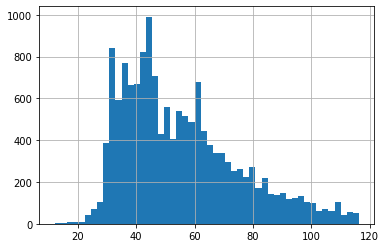

In [36]:
data['total_area'].sort_values().hist(bins=50)

<AxesSubplot:>

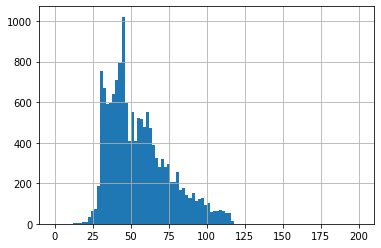

In [37]:
data['total_area'].sort_values().hist(bins=100, range=(0, 200))

Распределение квартир по общей площади выглядит нормальным. Среди объявлений есть аппартаменты с большой общей площадью и маленькие квартиры, общей площадью менее 25кв м. Основная масса квартир имеет общую площадь от 35 до 70 квадратных метров. Это нормальная площадь для 2-ух и 3-ех комнатных квартир. Далее увидим насколько график по количеству комнат похож на этот.

<AxesSubplot:>

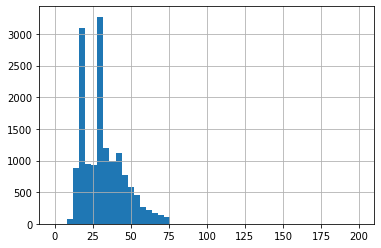

In [38]:
data['living_area'].sort_values().hist(bins=50, range=(0, 200))

На гистограмме по жилой площади квартир наблюдаются 2 пика - около 20кв м и около 30кв м. Логично предположить, что разница в значении данных пиков в одну комнату. То есть мы наблюдаем пики, которые подтверждают большое количество объявлений для 2-ух и 3-ех комнатных квартир. 

<AxesSubplot:>

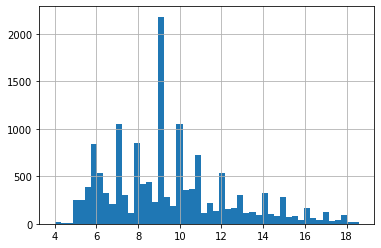

In [39]:
data['kitchen_area'].sort_values().hist(bins=50)

Основная масса квартир продавалась с площадью кухни от 6 до 10 квадратных метров. Пик наблюдается по кухням площаью 9кв м. Это достаточно неплохая по размеру кухня, данные выглядят правдоподобно.

<AxesSubplot:>

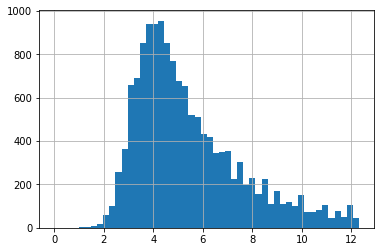

In [40]:
data['last_price'] = data['last_price'] / 1000000
data['last_price'].sort_values().hist(bins=50)

Данное распределение выглядит правильным. Основная масса квартир из выборки имеют цену от 3млн до 6млн рублей. 
Видно повышение числа квартир стоимостью 10млн и более. для Санкт-Петербурга это нормально. У больших квартир, а тем более в черте города, средняя цена значительно выше. 

<AxesSubplot:>

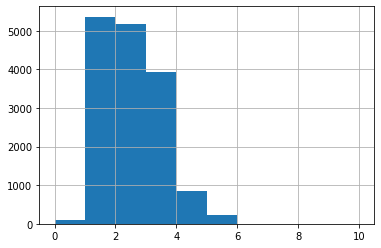

In [41]:
data['rooms'].sort_values().hist(bins=10, range=(0, 10))

Как и предполагалось, основная часть объявлений по 2-ух и 3-ех комнатным квартирам. 4-ехкомнатных квартир также немало, около 5800 объявлений.  

<AxesSubplot:>

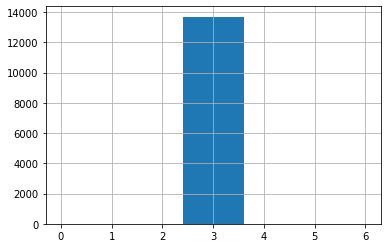

In [42]:
data['ceiling_height'].sort_values().hist(bins=5, range=(0,6))

Нормальная высота потолков в квартирах обычно около 3-4 метров. На гистограмме именно такие данные и отображены.

<AxesSubplot:>

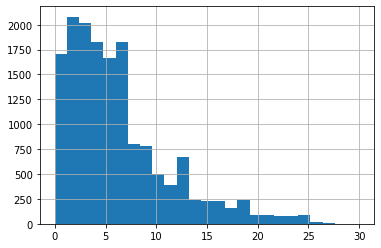

In [43]:
data['floor'].sort_values().hist(bins=25, range=(0, 30))

Основная масса квартир находится в пределах первых 7-ти этажей здания. 

<AxesSubplot:>

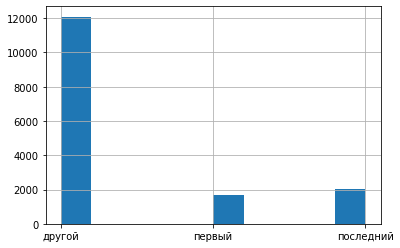

In [44]:
data['floor_type'].sort_values().hist()

Если вернуться к предыдущей гистограмме, можно заметить, что удивительно много квартир продается на первом этаже.
Но глядя на эти данные, оказывается, квартиры на последнем этаже продаются чаще, чем на первом.
Примем к сведению эти данные.

<AxesSubplot:>

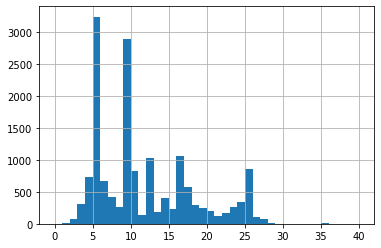

In [45]:
data['floors_total'].sort_values().hist(bins=40, range=(0, 40))

В основном квартиры продаются в 5-ти и 9-ти этажных домах. Это логично, так как соответствует типичной застройке городов России. Можно заметить, 3 небольших пика по 13-ти, 17-ти и 26-ти этажным домам. Тоже интересно. Возможно, это последний этаж здания. 

<AxesSubplot:>

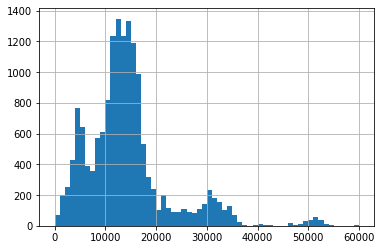

In [46]:
data['cityCenters_nearest'].sort_values().hist(bins=60, range=(0, 60000))

Большая часть кватртир находится в 13-14 км от центра города. Также наблдается небольшой пик, где видно, что объявлений о продаже квартир в 5-6км от центра тоже немало.   

<AxesSubplot:>

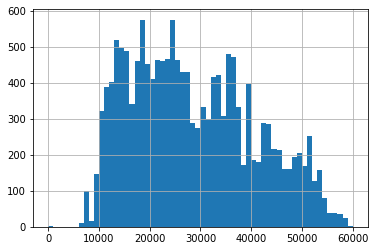

In [47]:
data['airports_nearest'].sort_values().hist(bins=60, range=(0, 60000))

Самое частое расстояние до аэропорта в 2 раза превышает расстояние до центра. В выборке более 6000 квартир находится в 25-26 км от ближайшего аэропорта.

<AxesSubplot:>

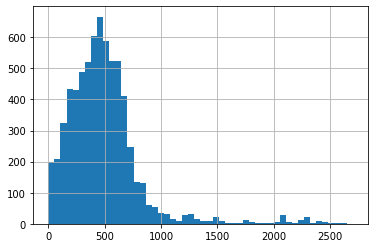

In [48]:
data['parks_nearest'].sort_values().hist(bins=50, range=(0, 2700))

Если в объявлении и указано расстояние до ближайшего парка, чаще всего до него менее 1 км.
При предобработке данных по ближайшим паркам мы указали, что квартиры, в близости которых нет парков, имеют значение в данном столбце **-1**. Посмотрим какое количество от общей массы квартир не имеет парков поблизости.

<AxesSubplot:>

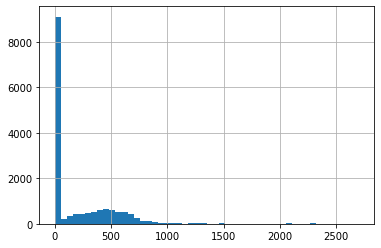

In [49]:
data['parks_nearest'].sort_values().hist(bins=50, range=(-1, 2700))

Почти 16 тысяч объявлений! Вероятно, квартиры с наличием парка поблизости продаются активнее. 

<AxesSubplot:>

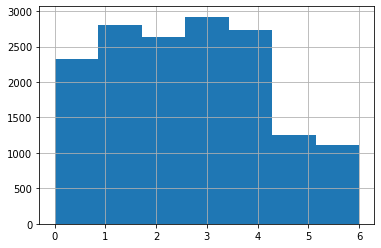

In [50]:
data['weekday_exposition'].sort_values().hist(bins=7, range=(0, 6))

По будням объявления выставляются со стабильной частотой. В выходные же резкое понижение - возможно это связано с тем, что у риелторов тоже бывают выходные.

<AxesSubplot:xlabel='month_exposition'>

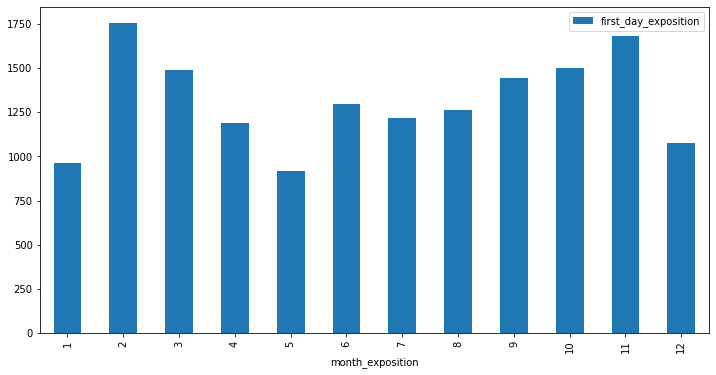

In [51]:
data.pivot_table(index='month_exposition', values='first_day_exposition', aggfunc='count').plot(kind="bar", figsize = (12, 6))  

В 2017 году сервис Яндекс.Недвижимость стал значительно набирать обороты. 
Проводя анализ, можно подметить следующее:
- в январе и мае наблюдается спад количества объявлений
- в феврале и ноябре выставляется больше всего объявлений

**Вывод**: Судя по графику, активнее всего объявления выставляются в феврале(спад до мая, затем снова рост) и ноябре(спад до января).

**Изучим, как быстро продавались квартиры, а также узнаем какие продажи являются слишком быстрыми, а какие слишком долгими.**


Медиана активности объявления: 86.0

Среднее время активности объявления: 128.75745033112582


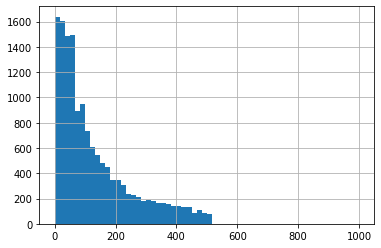

In [52]:
data['days_exposition'].sort_values().hist(bins=60, range=(0, 1000))
print()
print('Медиана активности объявления:', data['days_exposition'].median())
print()
print('Среднее время активности объявления:',data['days_exposition'].mean())

В среднем, продажа квартиры занимает 112 дней. Но это среднее значение, которое нельзя считать объективным показателем.
По медиане продажа квартиры занимает 95 дней. В сопоставлении с гистограммой всё сходится.

Основная часть объявлений остаются активными на протяжении 200 дней. Объявления, находящиеся активными дольше, встречаются все реже.

Изучим поподробнее отдельно быстрые продажи и долгие.

<AxesSubplot:>

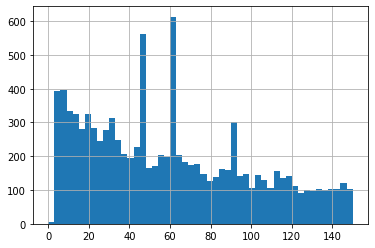

In [53]:
data['days_exposition'].sort_values().hist(bins=50, range=(0, 150))

По данной гистограмме стало понятно, что большое количество продаж происходит на 95-ом дне активности объявления.
Есть небольшие пики на 45-ом и 62-ом днях.

**Вывод:** Значения ниже 45 дней можно считать слишком быстрыми продажами.
Продажи до 20 дней, предположительно, могут быть фейковыми. То есть объявление было снято без продажи объекта, либо по другим причинам.
Продажи дольше 200 дней можно считать долгими, так как выбиваются из общей массы времени продаж. 

**Узнаем какие факторы больше всего влияют на общую (полную) стоимость объекта**

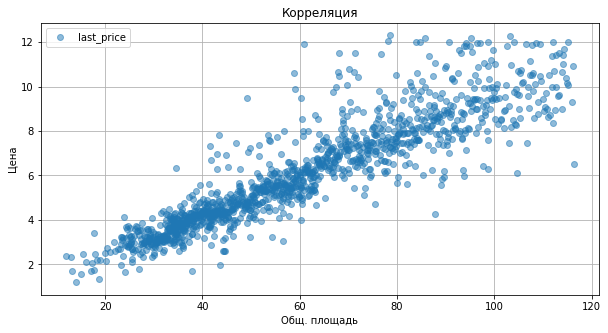

0.7835202462310925


In [54]:
data.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(10,5), alpha=0.5)
plt.title('Корреляция')
plt.xlabel('Общ. площадь')
plt.ylabel('Цена')
plt.show()
print(data['last_price'].corr(data['total_area']))

Корреляция цены и общей площади 0.69

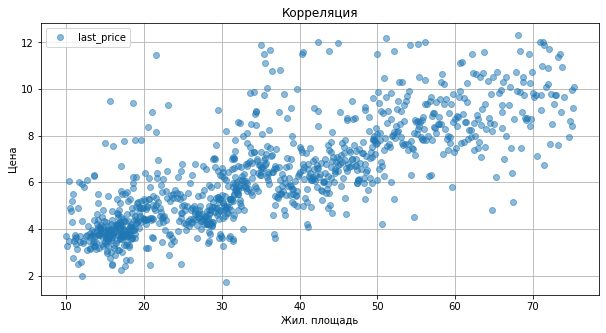

0.6239259952183015


In [55]:
data.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(10,5), alpha=0.5)
plt.title('Корреляция')
plt.xlabel('Жил. площадь')
plt.ylabel('Цена')
plt.show()
print(data['last_price'].corr(data['living_area']))

Корреляция цены и жилой площади 0.53

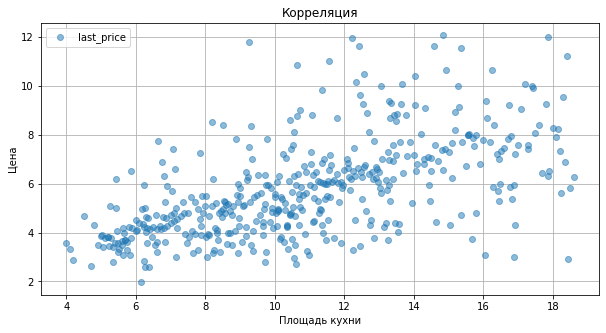

0.49215358063513726


In [56]:
data.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='o', figsize=(10,5), alpha=0.5)
plt.title('Корреляция')
plt.xlabel('Площадь кухни')
plt.ylabel('Цена')
plt.show()
print(data['last_price'].corr(data['kitchen_area']))

Корреляция цены и площади кухни 0.44

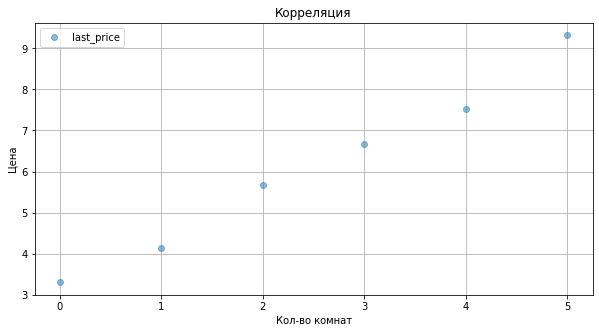

0.5256393370067798


In [57]:
data.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o', figsize=(10,5), alpha=0.5)
plt.title('Корреляция')
plt.xlabel('Кол-во комнат')
plt.ylabel('Цена')
plt.show()
print(data['last_price'].corr(data['rooms']))

Корреляция цены и количества комнат 0.44

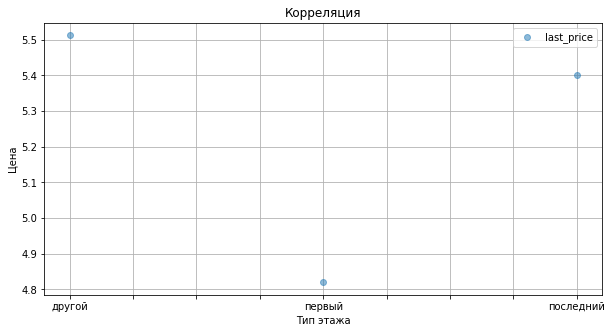

In [58]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='mean').plot(grid=True, style='o', figsize=(10,5), alpha=0.5)
plt.title('Корреляция')
plt.xlabel('Тип этажа')
plt.ylabel('Цена')
plt.show()

Квартиры на первом этаже самые дешевые. На последнем имеют среднюю стоимость, на других же этажах квартиры дороже.

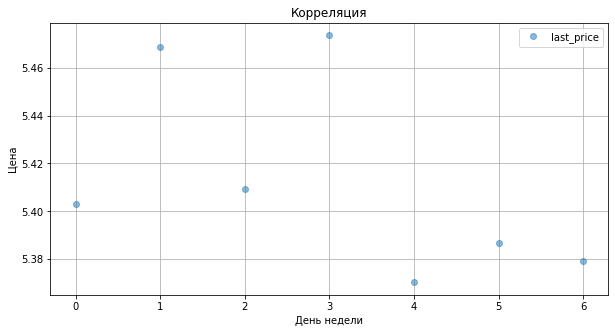

-0.008070357983095796


In [59]:
data.pivot_table(index='weekday_exposition', values='last_price').plot(grid=True, style='o', figsize=(10,5), alpha=0.5)
plt.title('Корреляция')
plt.xlabel('День недели')
plt.ylabel('Цена')
plt.show() 
print(data['last_price'].corr(data['weekday_exposition']))

Корреляция цены и дня недели выставления объявления о продаже 0.
Продажа квартиры никак не зависит от дня, когда было выставлено объявление.

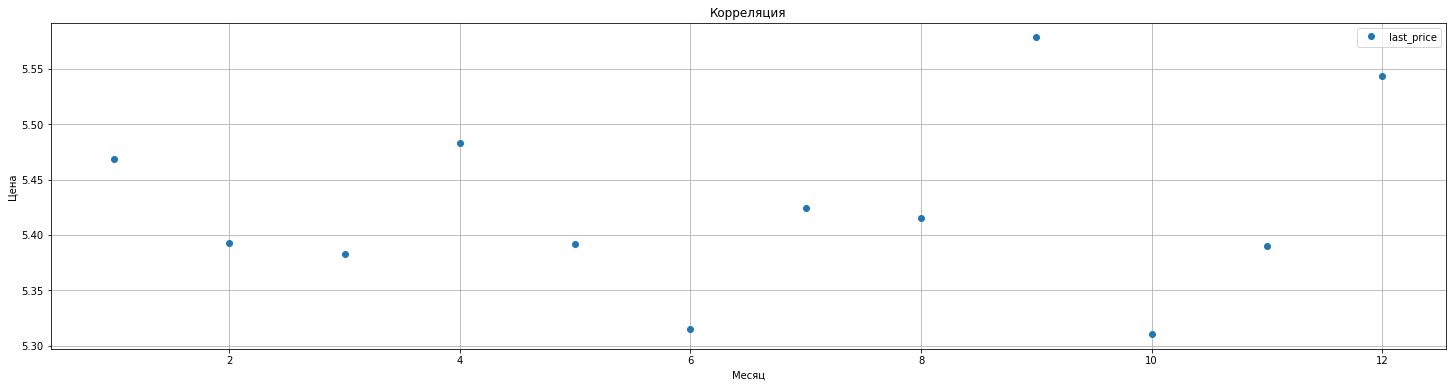

In [60]:
data.pivot_table(index='month_exposition', values='last_price').plot(grid=True, style='o', figsize=(25,6))
plt.title('Корреляция')
plt.xlabel('Месяц')
plt.ylabel('Цена')
plt.show() 

Самые низкие цены на квартиры можно наблюдать в июне и октябре. Самые же дорогие месяцы для покупки квартиры - сентябрь и декабрь.

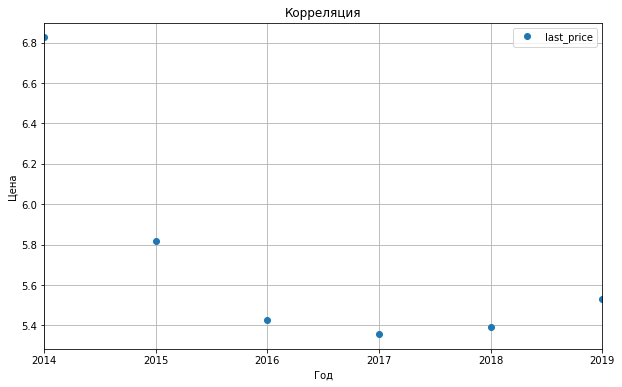

In [61]:
data.pivot_table(index='year_exposition', values='last_price').plot(grid=True, style='o', figsize=(10,6))
plt.title('Корреляция')
plt.xlabel('Год')
plt.ylabel('Цена')
plt.show() 

С 2015 до 2017 года заметен спад в стоимости квартир.
После 2017 года недвижимость снова начала дорожать.

**Вывод:** Общая площадь объекта месяц продажи квартиры и тип этажа больше всего влияют на полную стоимость. 

**Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.**

In [62]:
data['locality_name'].value_counts().head(10)

Санкт-Петербург    13591
Шушары               404
Колпино              307
Пушкин               307
Парголово            302
Петергоф             176
Сестрорецк           163
КрасноеСело          157
Ломоносов            113
Кронштадт             86
Name: locality_name, dtype: int64

In [63]:
locality_name_top10 = data.query('locality_name in ["Санкт-Петербург", "Мурино", "Кудрово", "Шушары", "Всеволожск", "Пушкин", "Колпино", "Парголово", "Гатчина", "Выборг"]')
square_price_top10 = locality_name_top10[['locality_name', 'square_price']]
square_price_top10.dropna()
print('Средняя цена одного квадратного метра в 10 насиленных пунктах с наибольшим числом объявлений:')
(square_price_top10.groupby('locality_name').sum()) / (square_price_top10.groupby('locality_name').count())

Средняя цена одного квадратного метра в 10 насиленных пунктах с наибольшим числом объявлений:


,square_price
locality_name,
Колпино,74610.157480
Мурино,79495.249451
Парголово,89672.150523
Пушкин,100223.451606
Санкт-Петербург,104792.455187
Шушары,77753.276552


**Вывод:** Самые дорогие квадратные метры в Санкт-Петербурге и Пушкине. Из топ-10 городов, дешевле всего обходится жилье в Выборге.

**Узнаем, зависит ли стоимость объектов в Санкт-Петербурге от расстояния до центра города.**

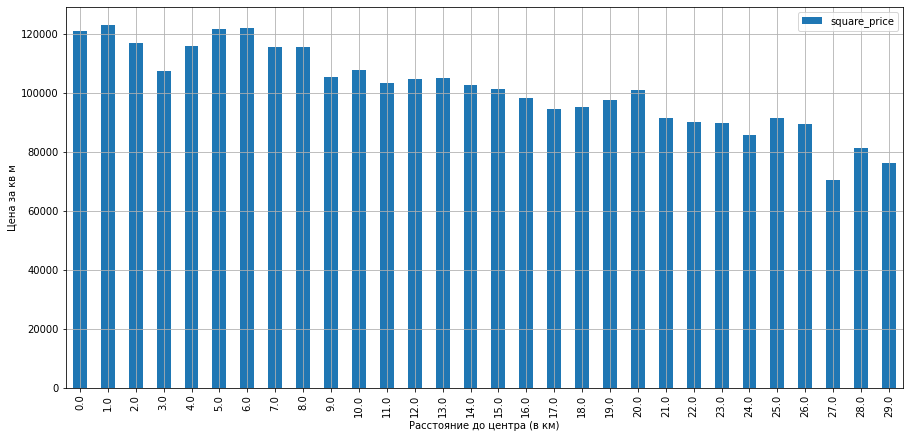

In [64]:
st_petersburg = data[data['locality_name'] == 'Санкт-Петербург']
#cityCenters_nearest_km_price = (st_petersburg['square_price']) / (st_petersburg ['cityCenters_nearest_km'])
#st_petersburg['cityCenters_nearest_km_price'] = cityCenters_nearest_km_price
#st_petersburg_pivot = st_petersburg.pivot_table(index='cityCenters_nearest_km', values='cityCenters_nearest_km_price', aggfunc='mean')
#st_petersburg_pivot.plot(grid=True, style='o', kind='bar', figsize=(15,7))
#plt.xlabel('Расстояние до центра (в км)')
#plt.ylabel('Цена за кв м')

st_petersburg.pivot_table(index='cityCenters_nearest_km', values='square_price').plot(grid=True, style='o', kind='bar', figsize=(15,7))
plt.xlabel('Расстояние до центра (в км)');
plt.ylabel('Цена за кв м');

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15802 entries, 1 to 23697
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            15802 non-null  int64         
 1   last_price              14457 non-null  float64       
 2   total_area              14960 non-null  float64       
 3   first_day_exposition    15802 non-null  datetime64[ns]
 4   rooms                   15669 non-null  float64       
 5   ceiling_height          13698 non-null  float64       
 6   floors_total            15802 non-null  float64       
 7   living_area             15200 non-null  float64       
 8   floor                   15802 non-null  int64         
 9   is_apartment            15802 non-null  bool          
 10  studio                  15802 non-null  bool          
 11  open_plan               15802 non-null  bool          
 12  kitchen_area            14890 non-null  float6

**Вывод:** Да, стоимость объектов в Санкт-Петербунге зависит от расстояния до центра. Объекты в радиусе 1км от центра имеют самую высокую цену (более 120 тыс за 1 кв м). 

### Общий вывод

Мы провели предобработку данных и изучили таблицу.
Можно выделить следующие особенности и зависимости, которые существуют на рынки недвижимости:

1. По будням объявления выставляются со стабильной частотой. В выходные показатели падают в 2 раза. Скорее всего это связано с выходными днями у риелторов.

2. Большинство квартир продаются в 5-ти и 9-ти этажных домах и являются 2-ух и 3-ех комнатными. 

3. Обычно квартиры продаются в течение 100 дней. Значения ниже 45 дней можно считать слишком быстрыми продажами. Продажи до 20 дней, предположительно, могут быть фейковыми. То есть объявление было снято без продажи объекта, либо по другим причинам. Продажи дольше 200 дней можно считать долгими, так как выбиваются из общей массы времени продаж.

4. Общая площадь объекта и тип этажа больше всего влияют на полную стоимость. Если с общей площадью все логично и понятно (чем больше, тем дороже объект), то по поводу типа этажа данные следующие:
- Квартиры на первом этаже самые дешевые (4.1млн - среднее значение стоимости)
- На последнем имеют среднюю стоимость  (4.5 - среднее значение стоимости)
- На других же этажах квартиры дороже (5.0 - среднее значение стоимости)

5. Самые дорогие квадратные метры в Санкт-Петербурге и Пушкине. Из топ-10 городов, дешевле всего обходится жилье в Выборге.
- Средняя стоимость квадратного метра в Санкт-Петербурге: 105684
- Средняя стоимость квадратного метра в Пушкине: 100462
- Средняя стоимость квадратного метра в Выборге: 58225

6. Стоимость объектов в Санкт-Петербунге зависит от расстояния до центра. Объекты в радиусе 1км от центра имеют самую высокую цену (более 120 тыс за 1 кв м). 

7. Продажа квартиры никак не зависит от дня, когда было выставлено объявление. Самые низкие цены на квартиры можно наблюдать в июне и октябре. Самые же дорогие месяцы для покупки квартиры - сентябрь и декабрь. С 2015 до 2017 года заметен спад в стоимости квартир. После 2017 года недвижимость снова начала дорожать, цены на рынке недвижимости плавно растут со временем.